In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
X_train = np.load("/kaggle/input/neymark-tsc/train_x.npy")
y_train = np.load("/kaggle/input/neymark-tsc/train_y.npy")
X_test_real = np.load("/kaggle/input/neymark-tsc/test_x.npy")


In [3]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 36.3 MB/s eta 0:00:0000:0100:01


In [ ]:
#!pip install  sktime-dl

# Baseline

In [10]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [12]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.metrics import f1_score
classifier = KNeighborsTimeSeriesClassifier(distance="euclidean")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
f1_score(y_test, y_pred, average="macro")

KNeighborsTimeSeriesClassifier(distance='euclidean')

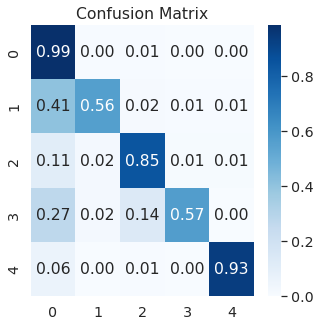

In [12]:
cm_plot(y_test, y_pred)

In [13]:
y_pred = classifier.predict(X_test_real)


In [14]:
# y_pred_csv = pd.DataFrame(list(range(len(y_pred))), columns=["Id"])
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0


# Resnet

In [ ]:
#!pip install sktime[all_extras]

In [16]:
#import tensorflow as tf
#from keras.losses import binary_crossentropy, categorical_crossentropy
#import keras.backend as K
#from tensorflow import keras
#from sklearn.metrics import f1_score
#from sktime.classification.deep_learning.resnet import ResNetClassifier

# Модели из Colab

Изначально делал в колабе, но так как там закончилось время на GPU, перешел сюда. Здесь приведу основные моменты, не запуская код. Также оставлю ссылку с выполненым ноутбуком в Colab:
https://colab.research.google.com/drive/1DlyFBDhh4wHsE-V45dK4-FgvWmGxXLWl?usp=sharing

In [4]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18912 sha256=2a2146a62e23e1a7222cc09c82304b1db4094ec1d7e317364c80374b1bca6ed2
  Stored in directory: /root/.cache/pip/wheels/95/b1/a8/5ee00cc137940b2f6fa198212e8f45d813d0e0d9c3a04035a3
Successfully built keras-self-attention


In [5]:
from sktime.classification.deep_learning.resnet import ResNetClassifier

In [10]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
#sm = SMOTE(random_state=42)
#X_res, y_res = sm.fit_resample(X_train, y_train)
#from tensorflow import keras
#from keras.optimizers import optimizer_v1
from sklearn.metrics import f1_score
classifier = ResNetClassifier(verbose=True,activation="Softmax",n_epochs=100,loss="categorical_crossentropy")
classifier.fit(X_train,y_train)
#y_pred = classifier.predict(X_test)
#f1_score(y_test, y_pred, average="macro")

****SMOTE и 100 эпох дало результат 0.83, 100 эпох без SMOTE дало результат 0.88219****

****Tapnet - предназначена для multivariate time series classification, но я захотел попробывать ее применить. F1-score оказался небольшим - 0.76. Ссылка на статью про неё: https://ojs.aaai.org/index.php/AAAI/article/view/6165****


In [ ]:
from sklearn.metrics import f1_score
from sktime.classification.deep_learning.tapnet import TapNetClassifier
classifier3 = TapNetClassifier(verbose=True,n_epochs=100,activation="softmax",loss="categorical_crossentropy")
classifier3.fit(X_train,y_train)

# Лучшие на открытой части датасета

****Во всех следующих моделях я забыл сохранить learning rate, эксперементируя с моделями. Я либо использовал Adam с 0.01(стандартный), либо c 0.003, либо с 0.006. Я больше склоняюсь ко второму варианту, его и оставлю****

In [7]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.003)

****F1-score=0.90288****

In [ ]:
from sklearn.metrics import f1_score
classifier = ResNetClassifier(verbose=True,activation="Softmax",n_epochs=300,loss="categorical_crossentropy",batch_size=256,optimizer=opt)
classifier.fit(X_train,y_train)

****F1-score=0.90374****

In [ ]:
from sklearn.metrics import f1_score
classifier = ResNetClassifier(verbose=True,activation="Softmax",n_epochs=250,loss="categorical_crossentropy",batch_size=256,optimizer=opt)
classifier.fit(X_train,y_train)

****Лучшее - F1-score=0.90898****

In [8]:
from sklearn.metrics import f1_score
classifier = ResNetClassifier(verbose=True,activation="Softmax",n_epochs=250,loss="categorical_crossentropy",batch_size=1024,optimizer=opt)
classifier.fit(X_train,y_train)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 187, 64)      576         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 187, 64)      256         conv1d_11[0][0]                  
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 187, 64)      0           batch_normalization_12[0][0]     
____________________________________________________________________________________________

ResNetClassifier(activation='Softmax', batch_size=1024, n_epochs=250,
                 optimizer=<keras.optimizer_v2.adam.Adam object at 0x7fbdb47d9750>,
                 verbose=True)

In [9]:
y_pred1024 = classifier.predict(X_test_real)

In [10]:
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred1024))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred1024).astype(int).astype(str)
y_pred_csv.to_csv("finalsubmission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0


# Resnet в kaggle

****Модель ниже получила 0.89154 на открытой части тестового датасета****

In [33]:
LEARNING_RATE=0.06
opt = keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=LEARNING_RATE, decay_steps=1000, decay_rate=0.4))
classifier2 = ResNetClassifier(verbose=True,activation="Softmax",n_epochs=700,loss="categorical_crossentropy",batch_size=1024,optimizer=opt)
classifier2.fit(X_train,y_train)

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_143 (Conv1D)             (None, 187, 64)      576         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_156 (BatchN (None, 187, 64)      256         conv1d_143[0][0]                 
__________________________________________________________________________________________________
activation_117 (Activation)     (None, 187, 64)      0           batch_normalization_156[0][0]    
___________________________________________________________________________________________

ResNetClassifier(activation='Softmax', batch_size=1024, n_epochs=500,
                 optimizer=<keras.optimizer_v2.adam.Adam object at 0x7fb744edd810>,
                 verbose=True)

In [35]:
y_pred_loss2 = classifier2.predict(X_test_real)

In [36]:
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred_loss2))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred_loss2).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission_loss2.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0


In [8]:
from imblearn.over_sampling import SMOTE

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

****дало 0.79315 на открытой части теста****

In [15]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.metrics import f1_score
classifier = KNeighborsTimeSeriesClassifier(distance="euclidean")
classifier.fit(X_res, y_res)
y_pred = classifier.predict(X_test)
f1_score(y_test, y_pred, average="macro")

0.7949690981270698

In [37]:
y_pred = classifier.predict(X_test_real)

In [38]:
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0


****дало f1-score, равное 0.84558****

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
from sktime.classification.interval_based import TimeSeriesForestClassifier
clf = TimeSeriesForestClassifier(n_estimators=100)
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)

In [12]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="macro")

0.8214468982027638

In [50]:
y_pred = clf.predict(X_test_real)
# y_pred_csv = pd.DataFrame(list(range(len(y_pred))), columns=["Id"])
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0
